In [1]:
#Patrick Woods, UID: 113520266
#Project 1, 6/11/19
#I apologize for the crazy high cell count numbers, re-ran MANY times while coding/debugging

import requests
import pandas as pd
import numpy as np
import html5lib
import lxml
import datetime
import re
import matplotlib.pyplot as plt
import math
from bs4 import BeautifulSoup

In [2]:
#Part 1
#Step 1
tables = pd.read_html('https://www.spaceweatherlive.com/en/solar-activity/top-50-solar-flares', flavor='html5lib')

In [3]:
table = tables[0]
print(table)

    Unnamed: 0 Unnamed: 1  Unnamed: 2  Region  Start Maximum    End  \
0            1      X28.0  2003/11/04     486  19:29   19:53  20:06   
1            2      X20.0  2001/04/02    9393  21:32   21:51  22:03   
2            3      X17.2  2003/10/28     486  09:51   11:10  11:24   
3            4      X17.0  2005/09/07     808  17:17   17:40  18:03   
4            5      X14.4  2001/04/15    9415  13:19   13:50  13:55   
5            6      X10.0  2003/10/29     486  20:37   20:49  21:01   
6            7       X9.4  1997/11/06    8100  11:49   11:55  12:01   
7            8       X9.3  2017/09/06    2673  11:53   12:02  12:10   
8            9       X9.0  2006/12/05     930  10:18   10:35  10:45   
9           10       X8.3  2003/11/02     486  17:03   17:25  17:39   
10          11       X8.2  2017/09/10    2673  15:35   16:06  16:31   
11          12       X7.1  2005/01/20     720  06:36   07:01  07:26   
12          13       X6.9  2011/08/09    1263  07:48   08:05  08:08   
13    

In [4]:
#Step 2
table.columns = ['rank', 'x_class', 'date', 'region', 'start', 'max', 'end', 'drop']

In [5]:
table = table.drop('drop', axis = 1)

In [6]:
for index, row in table.iterrows():
    date = row['date']
    s_datetime = datetime.datetime.strptime((date + ' ' + row['start']), '%Y/%m/%d %H:%M')
    m_datetime = datetime.datetime.strptime((date + ' ' + row['max']), '%Y/%m/%d %H:%M')
    e_datetime = datetime.datetime.strptime((date + ' ' + row['end']), '%Y/%m/%d %H:%M')
    table.at[index, 'start'] = s_datetime
    table.at[index, 'max'] = m_datetime
    table.at[index, 'end'] = e_datetime

In [7]:
table = table.drop('date', axis = 1)
#Top 50 tidying complete

In [8]:
table

,rank,x_class,region,start,max,end
0,1,X28.0,486,2003-11-04 19:29:00,2003-11-04 19:53:00,2003-11-04 20:06:00
1,2,X20.0,9393,2001-04-02 21:32:00,2001-04-02 21:51:00,2001-04-02 22:03:00
2,3,X17.2,486,2003-10-28 09:51:00,2003-10-28 11:10:00,2003-10-28 11:24:00
3,4,X17.0,808,2005-09-07 17:17:00,2005-09-07 17:40:00,2005-09-07 18:03:00
4,5,X14.4,9415,2001-04-15 13:19:00,2001-04-15 13:50:00,2001-04-15 13:55:00
5,6,X10.0,486,2003-10-29 20:37:00,2003-10-29 20:49:00,2003-10-29 21:01:00
6,7,X9.4,8100,1997-11-06 11:49:00,1997-11-06 11:55:00,1997-11-06 12:01:00
7,8,X9.3,2673,2017-09-06 11:53:00,2017-09-06 12:02:00,2017-09-06 12:10:00
8,9,X9.0,930,2006-12-05 10:18:00,2006-12-05 10:35:00,2006-12-05 10:45:00
9,10,X8.3,486,2003-11-02 17:03:00,2003-11-02 17:25:00,2003-11-02 17:39:00


In [9]:
#Step 3
r = requests.get('http://www.hcbravo.org/IntroDataSci/misc/waves_type2.html')
r.status_code

200

In [10]:
soup = BeautifulSoup(r.content, 'html.parser')

In [12]:
data = soup.find_all('pre')

In [13]:
temp = data[0].get_text()

In [14]:
f_data = temp.split('\n')

In [16]:
#delete the unecessary pre/post rows
del f_data[0:12]

In [17]:
del f_data[-1]

In [18]:
del f_data[-1]

In [19]:
del f_data[-1]

In [20]:
f_data

['1997/04/01 14:00 04/01 14:15  8000  4000   S25E16  8026 M1.3   04/01 15:18   74   79  312   PHTX',
 '1997/04/07 14:30 04/07 17:30 11000  1000   S28E19  8027 C6.8   04/07 14:27 Halo  360  878   PHTX',
 '1997/05/12 05:15 05/14 16:00 12000    80   N21W08  8038 C1.3   05/12 05:30 Halo  360  464   PHTX',
 '1997/05/21 20:20 05/21 22:00  5000   500   N05W12  8040 M1.3   05/21 21:00  263  165  296   PHTX',
 '1997/09/23 21:53 09/23 22:16  6000  2000   S29E25  8088 C1.4   09/23 22:02  133  155  712   PHTX',
 '1997/11/03 05:15 11/03 12:00 14000   250   S20W13  8100 C8.6   11/03 05:28  240  109  227   PHTX',
 '1997/11/03 10:30 11/03 11:30 14000  5000   S16W21  8100 M4.2   11/03 11:11  233  122  352   PHTX',
 '1997/11/04 06:00 11/05 04:30 14000   100   S14W33  8100 X2.1   11/04 06:10 Halo  360  785   PHTX',
 '1997/11/06 12:20 11/07 08:30 14000   100   S18W63  8100 X9.4   11/06 12:10 Halo  360 1556   PHTX',
 '1997/11/27 13:30 11/27 14:00 14000  7000   N17E63  8113 X2.6   11/27 13:56   98   91  441

In [21]:
#turn strings into list of strings of each component, keep the last section from splitting
for index in range(len(f_data)):
    f_data[index] = f_data[index].split(maxsplit=14)

In [22]:
table2 = pd.DataFrame(f_data, columns =['start', 'start2', 'end', 'end2', 'start_freq', 'end_freq', 'loc', 'reg', 'imp', 'cme_date', 'time', 'cpa', 'wid', 'speed', 'plot'])

In [23]:
table2

,start,start2,end,end2,start_freq,end_freq,loc,reg,imp,cme_date,time,cpa,wid,speed,plot
0,1997/04/01,14:00,04/01,14:15,8000,4000,S25E16,8026,M1.3,04/01,15:18,74,79,312,PHTX
1,1997/04/07,14:30,04/07,17:30,11000,1000,S28E19,8027,C6.8,04/07,14:27,Halo,360,878,PHTX
2,1997/05/12,05:15,05/14,16:00,12000,80,N21W08,8038,C1.3,05/12,05:30,Halo,360,464,PHTX
3,1997/05/21,20:20,05/21,22:00,5000,500,N05W12,8040,M1.3,05/21,21:00,263,165,296,PHTX
4,1997/09/23,21:53,09/23,22:16,6000,2000,S29E25,8088,C1.4,09/23,22:02,133,155,712,PHTX
5,1997/11/03,05:15,11/03,12:00,14000,250,S20W13,8100,C8.6,11/03,05:28,240,109,227,PHTX
6,1997/11/03,10:30,11/03,11:30,14000,5000,S16W21,8100,M4.2,11/03,11:11,233,122,352,PHTX
7,1997/11/04,06:00,11/05,04:30,14000,100,S14W33,8100,X2.1,11/04,06:10,Halo,360,785,PHTX
8,1997/11/06,12:20,11/07,08:30,14000,100,S18W63,8100,X9.4,11/06,12:10,Halo,360,1556,PHTX
9,1997/11/27,13:30,11/27,14:00,14000,7000,N17E63,8113,X2.6,11/27,13:56,98,91,441,PHTX


In [24]:
#Step 4
table2.replace({'24:00': '00:00', '-----' : np.nan, '----' : np.nan, '--/--' : np.nan, '--:--' : np.nan, 'altr' : np.nan, '????' : np.nan, 'back?' : np.nan, 'EP?' : np.nan, 'EP' : np.nan, 'DIM' : np.nan, 'DSF' : np.nan, 'FILA' : np.nan}, inplace=True)

In [26]:
#bulk work of the tidying
#reconciles all of the times, creates the 2 new columns for halos/lower bound
#replcaces 'Halos' with NaNs
w_list = list()
h_list = list()

for index, row in table2.iterrows():
    date = row['start']
    temp = date.split('/')
    date2 = temp[0] + '/' + row['end']
    
    if isinstance(row['cme_date'], str):
        dateC = temp[0] + '/' + row['cme_date']
        c_datetime = datetime.datetime.strptime((dateC + ' ' + row['time']), '%Y/%m/%d %H:%M')
        table2.at[index, 'cme_date'] = c_datetime
        
    s_datetime = datetime.datetime.strptime((date + ' ' + row['start2']), '%Y/%m/%d %H:%M')
    e_datetime = datetime.datetime.strptime((date2 + ' ' + row['end2']), '%Y/%m/%d %H:%M')
    table2.at[index, 'start'] = s_datetime
    table2.at[index, 'end'] = e_datetime
    
    if row['cpa'] == 'Halo':
        h_list.append(True)
    else:
        h_list.append(False)
        
    temp = row['wid']
    if isinstance(temp, str):
        if temp[0] == '>':
            w_list.append(True)
            table2.at[index, 'wid'] = temp[1:]
        else:
            w_list.append(False)
    else:
        w_list.append(False)
        
table2['is_halo'] = h_list
table2['is_lower_b'] = w_list
table2.replace({'Halo': np.nan}, inplace=True)

In [28]:
table2.drop(['start2', 'end2', 'time'], axis=1, inplace=True)

In [29]:
#Tidying NASA data complete
table2

,start,end,start_freq,end_freq,loc,reg,imp,cme_date,cpa,wid,speed,plot,is_halo,is_lower_b
0,1997-04-01 14:00:00,1997-04-01 14:15:00,8000,4000,S25E16,8026,M1.3,1997-04-01 15:18:00,74,79,312,PHTX,False,False
1,1997-04-07 14:30:00,1997-04-07 17:30:00,11000,1000,S28E19,8027,C6.8,1997-04-07 14:27:00,NaN,360,878,PHTX,True,False
2,1997-05-12 05:15:00,1997-05-14 16:00:00,12000,80,N21W08,8038,C1.3,1997-05-12 05:30:00,NaN,360,464,PHTX,True,False
3,1997-05-21 20:20:00,1997-05-21 22:00:00,5000,500,N05W12,8040,M1.3,1997-05-21 21:00:00,263,165,296,PHTX,False,False
4,1997-09-23 21:53:00,1997-09-23 22:16:00,6000,2000,S29E25,8088,C1.4,1997-09-23 22:02:00,133,155,712,PHTX,False,False
5,1997-11-03 05:15:00,1997-11-03 12:00:00,14000,250,S20W13,8100,C8.6,1997-11-03 05:28:00,240,109,227,PHTX,False,False
6,1997-11-03 10:30:00,1997-11-03 11:30:00,14000,5000,S16W21,8100,M4.2,1997-11-03 11:11:00,233,122,352,PHTX,False,False
7,1997-11-04 06:00:00,1997-11-05 04:30:00,14000,100,S14W33,8100,X2.1,1997-11-04 06:10:00,NaN,360,785,PHTX,True,False
8,1997-11-06 12:20:00,1997-11-07 08:30:00,14000,100,S18W63,8100,X9.4,1997-11-06 12:10:00,NaN,360,1556,PHTX,True,False
9,1997-11-27 13:30:00,1997-11-27 14:00:00,14000,7000,N17E63,8113,X2.6,1997-11-27 13:56:00,98,91,441,PHTX,False,False


In [30]:
#Part2
#Replication
max_list = list()
list_50 = list() 

for index, row in table2.iterrows():
    temp = row['imp']
    if isinstance(temp, str):
        if temp[0] == 'X':
            max_list.append(temp[1:])

max_list.sort(key=float,reverse=True)
max_list = max_list[:50]
max_list = ["X" + val for val in max_list]

for index, row in table.iterrows():
    list_50.append(row['x_class'])
    
list(zip(max_list, list_50))

#The data is comparable but by no means the same. Manually searching through the NASA data didn't yield me
#the missing results from the top 50 list. This leaves me to believe that they are either pulling from different
#data sets, or that the top 50 list includes events during times that the NASA data does not contain.

[('X28.', 'X28.0'),
 ('X20.', 'X20.0'),
 ('X17.', 'X17.2'),
 ('X14.', 'X17.0'),
 ('X10.', 'X14.4'),
 ('X9.4', 'X10.0'),
 ('X9.0', 'X9.4'),
 ('X8.3', 'X9.3'),
 ('X7.1', 'X9.0'),
 ('X6.9', 'X8.3'),
 ('X6.5', 'X8.2'),
 ('X6.2', 'X7.1'),
 ('X5.7', 'X6.9'),
 ('X5.6', 'X6.5'),
 ('X5.4', 'X6.2'),
 ('X5.3', 'X6.2'),
 ('X4.9', 'X5.7'),
 ('X4.8', 'X5.6'),
 ('X4.0', 'X5.4'),
 ('X3.9', 'X5.4'),
 ('X3.8', 'X5.4'),
 ('X3.6', 'X5.3'),
 ('X3.4', 'X4.9'),
 ('X3.4', 'X4.9'),
 ('X3.3', 'X4.8'),
 ('X3.2', 'X4.0'),
 ('X3.1', 'X3.9'),
 ('X2.8', 'X3.9'),
 ('X2.7', 'X3.8'),
 ('X2.7', 'X3.7'),
 ('X2.6', 'X3.6'),
 ('X2.6', 'X3.6'),
 ('X2.6', 'X3.6'),
 ('X2.5', 'X3.4'),
 ('X2.3', 'X3.4'),
 ('X2.3', 'X3.3'),
 ('X2.3', 'X3.3'),
 ('X2.2', 'X3.3'),
 ('X2.1', 'X3.2'),
 ('X2.1', 'X3.1'),
 ('X2.1', 'X3.1'),
 ('X2.1', 'X3.0'),
 ('X2.0', 'X2.8'),
 ('X2.0', 'X2.8'),
 ('X2.0', 'X2.8'),
 ('X2.0', 'X2.7'),
 ('X1.9', 'X2.7'),
 ('X1.8', 'X2.7'),
 ('X1.8', 'X2.6'),
 ('X1.8', 'X2.6')]

In [31]:
#Integration
rank_list = list()
for i in range(len(table2.index)):
    rank_list.append(np.nan)
table2['rank'] = rank_list

for index, row in table.iterrows():
    for index2, row2 in table2.iterrows():
        temp1 = row['x_class']
        temp2 = row2['imp']
        temp3 = row['region']
        temp4 = row2['reg']
        if isinstance(temp2, str):
            if float(temp1[1:]) == float(temp2[1:]):
                d1 = row['start']
                d2 = row2['start']
                d3 = row['end']
                d4 = row2['end']
                if d1.month == d2.month:
                    if d1.day == d2.day:
                        table2.at[index2, 'rank'] = row['rank']
                elif d3.month == d4.month:
                    if d3.day == d4.day:
                        table2.at[index2, 'rank'] = row['rank']
                        
        elif isinstance(row2['reg'], str):
            if row2['reg'] == row['region']:
                d1 = row['start']
                d2 = row2['start']
                d3 = row['end']
                d4 = row2['end']
                if d1.month == d2.month:
                    if d1.day == d2.day:
                        table2.at[index2, 'rank'] = row['rank']
                elif d3.month == d4.month:
                    if d3.day == d4.day:
                        table2.at[index2, 'rank'] = row['rank']
                        
#There are two main comparisons being done here. First, I check if the classication value is the same.
#If that fails, then I check to see if the flare's regions are matching. If either case return true,
#I verify again to check if either the start or end dates or comparable between the flares.
#At the beginning of this cell, I create a list of all NaN's to be placed in the new 'rank' column.
#If a match is found, I replace that specific row with the appropiate ranking.

In [32]:
table2

,start,end,start_freq,end_freq,loc,reg,imp,cme_date,cpa,wid,speed,plot,is_halo,is_lower_b,rank
0,1997-04-01 14:00:00,1997-04-01 14:15:00,8000,4000,S25E16,8026,M1.3,1997-04-01 15:18:00,74,79,312,PHTX,False,False,NaN
1,1997-04-07 14:30:00,1997-04-07 17:30:00,11000,1000,S28E19,8027,C6.8,1997-04-07 14:27:00,NaN,360,878,PHTX,True,False,NaN
2,1997-05-12 05:15:00,1997-05-14 16:00:00,12000,80,N21W08,8038,C1.3,1997-05-12 05:30:00,NaN,360,464,PHTX,True,False,NaN
3,1997-05-21 20:20:00,1997-05-21 22:00:00,5000,500,N05W12,8040,M1.3,1997-05-21 21:00:00,263,165,296,PHTX,False,False,NaN
4,1997-09-23 21:53:00,1997-09-23 22:16:00,6000,2000,S29E25,8088,C1.4,1997-09-23 22:02:00,133,155,712,PHTX,False,False,NaN
5,1997-11-03 05:15:00,1997-11-03 12:00:00,14000,250,S20W13,8100,C8.6,1997-11-03 05:28:00,240,109,227,PHTX,False,False,NaN
6,1997-11-03 10:30:00,1997-11-03 11:30:00,14000,5000,S16W21,8100,M4.2,1997-11-03 11:11:00,233,122,352,PHTX,False,False,NaN
7,1997-11-04 06:00:00,1997-11-05 04:30:00,14000,100,S14W33,8100,X2.1,1997-11-04 06:10:00,NaN,360,785,PHTX,True,False,NaN
8,1997-11-06 12:20:00,1997-11-07 08:30:00,14000,100,S18W63,8100,X9.4,1997-11-06 12:10:00,NaN,360,1556,PHTX,True,False,7.0
9,1997-11-27 13:30:00,1997-11-27 14:00:00,14000,7000,N17E63,8113,X2.6,1997-11-27 13:56:00,98,91,441,PHTX,False,False,50.0


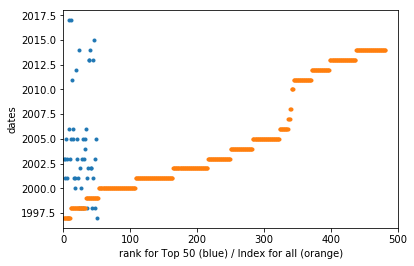

In [884]:
#Analysis
fig = plt.figure()
plt.axis((0, 500, 1996, 2018))
plt.xlabel('rank for Top 50 (blue) / Index for all (orange)')
plt.ylabel('dates')

dates = table['start']
dates2 = table2['start']
dates_f = list()
dates_f2 = list()
for row in dates:
    dates_f.append(row.year)
for row in dates2:
    dates_f2.append(row.year)
    
plt.scatter(table['rank'], dates_f, marker='.')
datavalues2 = (table2.index).to_list()
plt.scatter(datavalues2, dates_f2, marker='.')

#After reading the submission details for Part3 Step: Analysis, it seems my methodology
#for plotting might be off. In any case, my goal for this graph was simple. But first, let me 
#explain the layout of the graph. The y-axis maintains the dates of the flares, while the x-axis maintains
#the ranking for blue plots (top 50) and the index for orange plots (NASA data). I wanted to see
#a couple different comparisons. First, I wanted to know if higher ranking or lower ranking flares
#grouped around a particular date. This does not seem to be the case, as there is seemingly an even distribution
#of >25 and <25 ranking flares for most of the dates. Then, I wanted to see what the correlation between all 
#flares/top 50 flares was in relation to dates. This was more interesting: 
#you can see in both sets of data that they group away from 2007-2010. The wider the lines are for orange/blue, 
#the more flare occurences there are for that particular year. This suggests to me that the Sun goes through periods
#where overall solar activity increases; that there are probably more recordings of top 50's at this time, 
#because the sun is producing a lot more flares to begin with. The more flares that the sun produces, 
#the more opportunity there is for a top 50 flare to occur. 